The presence of thermal phonons induce a dephasing in the molecule that contributes to the linewidth. Moreover also the light absorbtion is strongly modified by the presence of these thermal phonons. A fraction of power does not go into the molecule, but rather scattered into some phononinc mode. This fraction is called Debye-Waller factor and we compute it using Clear et. al theory:
$$
\Omega \longmapsto \Omega e^{-\phi}
$$
The argument of the exponential is a function of the themperature $\phi=\phi(T)$ analogous to the Arrenious law that regulates the dephasing contribution to the linewidth $\gamma_{\rm deph}(T)$. Following Clear, the calculation is very similar, leading to a sensibly reduced Rabi frequency.
This effect could explain the anomalous saturation as a heating effect.

In [212]:
import numpy as np
import scipy
from qutip import *
from numba import jit, njit

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm

from plotly.offline import plot
import plotly.graph_objs as go

In [213]:
arr_P = np.logspace(-3,2,1000)   #P/P_s power respect to saturation

arr_om = 2*np.pi * np.linspace(1e-3,20,10000)    #in THz
dom = arr_om[1]-arr_om[0]   #frequency step to perform the integral
A = 2    #amplitude of the argument of the polaron dressing of the Rabi frequency
mu = .2
xi = 2*np.pi * .1    #in THz cutoff frequency of the phonon DOS. Here we use a value strongly different from Clear! It means that only low-energy phonons with freq. < 100 GHz contributes.
                     #it might be related to the cryostat specific properties

T0 = 2*np.pi * 1e-2  #in THz temperature reference for the conversion from power

E = 1.   #exponent of the power-to-temperature conversion law
arr_T = T0 * arr_P**E   #conversion law from power to temperature

om, T = np.meshgrid(arr_om, arr_T)

nT = np.exp(-om/T)/(1-np.exp(-om/T))    #phonon population at temp T (Bose-Einstein distribution)

Phi = A * dom*np.sum( (om**2) * np.exp(-om/xi) * (1+2*nT), axis=1 ) #argument of the polaron dressing
gam = mu * dom*np.sum( (om**6) * np.exp(-om/xi) * nT*(1+nT), axis=1 ) #contribution to the linewidth from phonon-dephasing (Arrenious curve)

Text(0, 0.5, '$\\gamma_{\\rm deph}/\\gamma_0$')

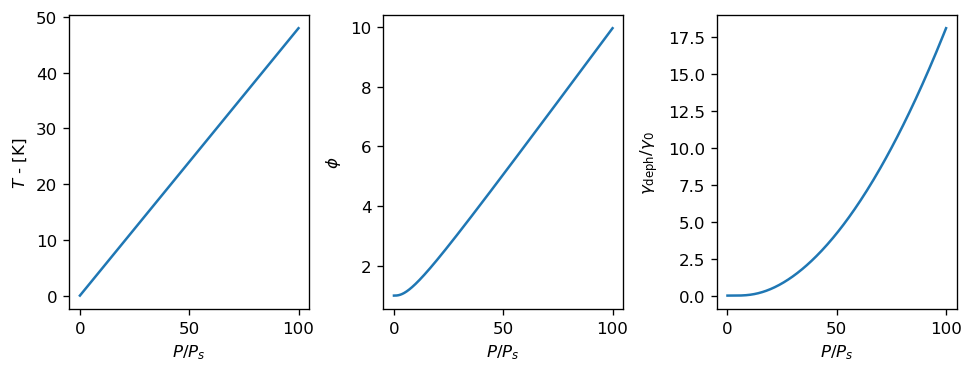

In [211]:
#plot of the relevant quantities in the problem: P-to-T, P-to-Phi, P-to-dephasing
fig, ax = plt.subplots(1, 3, dpi=120, figsize=(8, 3), constrained_layout=True)
ax[0].plot( arr_P, arr_T/(2*np.pi) * 47.992 )
ax[0].set_xlabel(r'$P/P_s$')
ax[0].set_ylabel(r'$T$ - [K]')
ax[1].plot( arr_P, Phi )
ax[1].set_xlabel(r'$P/P_s$')
ax[1].set_ylabel(r'$\phi$')
ax[2].plot(arr_P, gam)
ax[2].set_xlabel(r'$P/P_s$')
ax[2].set_ylabel(r'$\gamma_{\rm deph}/\gamma_0$')


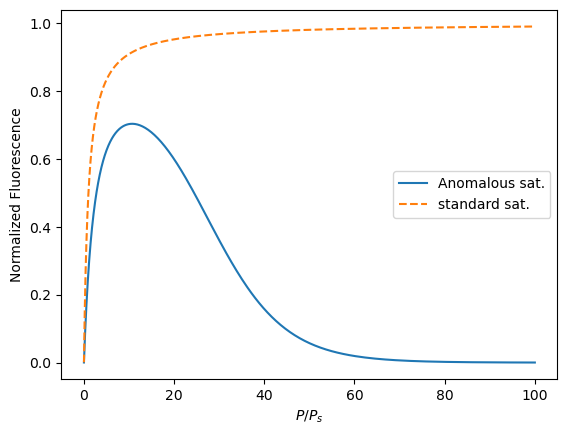

In [210]:
#plot resulting saturation curves
eff_P = np.exp(-Phi)*arr_P/(1+gam)  #new effective absorbed power after the effect of phonon
F = eff_P/(1+eff_P)                 #new saturation curve
plt.plot(arr_P, F, label='Anomalous sat.' )
plt.plot(arr_P, arr_P/(1+arr_P), linestyle='--', label='standard sat.')
plt.xlabel(r'$P/P_s$')
plt.ylabel(r'Normalized Fluorescence')
plt.legend()